In [1]:
import platform
import matplotlib.pyplot as plt
import pandas as pd
import csv
import numpy as np
plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False 

In [5]:

f = open('daegu.csv','r',encoding='utf-8')
data= csv.reader(f,delimiter=',')
header=next(data)
for i in data:
    print(i)
f.close()

['1909-01-01', '143', '-4.1', '-8', '0.1']
['1909-01-02', '143', '-0.8', '-6.7', '6.1']
['1909-01-03', '143', '1', '-2.4', '3.6']
['1909-01-04', '143', '4.2', '0', '9.2']
['1909-01-05', '143', '3.4', '-0.4', '9']
['1909-01-06', '143', '2.3', '-1.2', '7.4']
['1909-01-07', '143', '0.8', '-2.8', '6.4']
['1909-01-08', '143', '-0.5', '-4.4', '4.9']
['1909-01-09', '143', '-1', '-4.4', '5.3']
['1909-01-10', '143', '1.1', '-5.3', '8.4']
['1909-01-11', '143', '0.7', '-3.6', '6.1']
['1909-01-12', '143', '2.1', '-2.2', '7.1']
['1909-01-13', '143', '0.7', '-3.7', '3.9']
['1909-01-14', '143', '-1', '-4.7', '4.9']
['1909-01-15', '143', '-0.5', '-5.7', '5.3']
['1909-01-16', '143', '0.8', '-4.8', '6.4']
['1909-01-17', '143', '2.4', '-3.4', '9.3']
['1909-01-18', '143', '4.5', '0.7', '6.6']
['1909-01-19', '143', '2.2', '0.3', '5']
['1909-01-20', '143', '-0.3', '-2.4', '2.9']
['1909-01-21', '143', '-1.6', '-5', '1.6']
['1909-01-22', '143', '-3.5', '-7.7', '0.9']
['1909-01-23', '143', '-1.7', '-6.9', '3.8

In [7]:
f = open('daegu.csv','r',encoding='utf-8')
data= csv.reader(f,delimiter=',')
header=next(data)
m= -999
date=''


for row in data:
    if row[-1]:
        row[-1]=float(row[-1])
        if row[-1]>m:
            m=row[-1]
            date=row[0]


print("대구의 역대 최고 기온은 {}에 {}도였습니다".format(date,m))



f.close()

대구의 역대 최고 기온은 1942-08-01에 40.0도였습니다


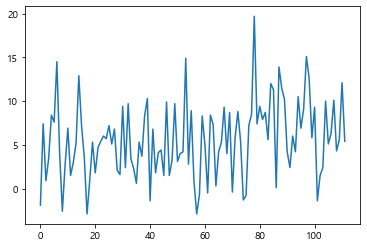

In [11]:
f = open('daegu.csv','r',encoding='utf-8')
data= csv.reader(f,delimiter=',')
header=next(data)
m= -999
date=''
result =[]

for row in data:
    if row[-1]:
        if row[0].split('-')[1] =='12' and row[0].split('-')[2] =='25':
            result.append(float(row[-1]))


plt.plot(result)



f.close()

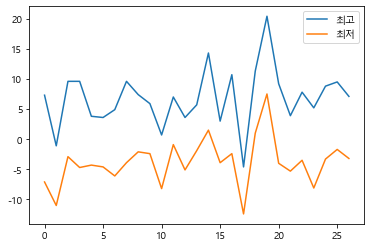

In [15]:
f = open('daegu.csv','r',encoding='utf-8')
data= csv.reader(f,delimiter=',')
header=next(data)
m= -999
date=''
result =[]
result1 =[]

for row in data:
    if row[-1]:
        if row[0].split('-')[1] =='02' and row[0].split('-')[2] =='02':
            if int(row[0].split('-')[0]) >= 1995: 
                result.append(float(row[-1]))
                result1.append(float(row[-2]))


plt.plot(result,label='최고')
plt.plot(result1,label='최저')
plt.legend()

plt.show()


f.close()

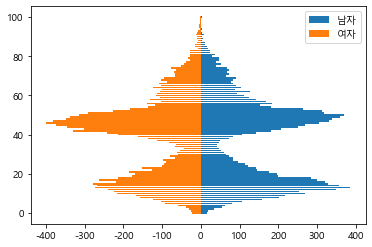

In [27]:
#우리 동네 인구변화

f = open('people.csv','r',encoding='utf-8')
data = csv.reader(f,delimiter=',')
next(data)

m =[]
w = []

area=input('원하는 지역을 입력하세요')

for row in data:
    
    if area in row[0]:
        for i in row[3:104]:
            m.append(int(i))
        for i in row[106:]:
            w.append(-int(i))

plt.barh(range(101),m,label='남자')
plt.barh(range(101),w,label='여자')
plt.legend()

plt.show()

In [3]:
#유임 승차 비율이 가장 높은 역?

f= open('traffic.csv','r',encoding='utf-8')
data = csv.reader(f,delimiter=',')
next(data)

m=0

station=''

for row in data:
    row[4] = int(row[4])
    row[6] = int(row[6])
    if row[4] and row[6] !=0:
        a= row[4]/(row[4]+row[6]) *100
        if a>m:
            m=a
            station=row[3]

print('유임승차 비율이 가장 높은 역은 {}이고 {}% 입니다'.format(station,round(m,1)))


유임승차 비율이 가장 높은 역은 연신내이고 97.4% 입니다


In [2]:
#유무임 승하차 인원이 가장 많은 or 적은 역 어디일까

f = open('traffic.csv','r',encoding='utf-8')
data = csv.reader(f, delimiter= ',')

next(data)

min=[100000000000]*4
station = [''] *4

for row in data:
    if row[-1] != '0':
        for i in range(4,8):
            row[i] = int(row[i])
            if row[i] < min[i-4]:
                min[i-4]= row[i]
                station[i-4] = row[3] + ' ' + row[1]

print(min)
print(station)

f.close()

[626, 446, 74, 63]
['임진강 경의선', '임진강 경의선', '옥수 경원선', '옥수 경원선']


In [ ]:
# 모든 역의 유무임 승하차 비율을 모두 분석해보자.

f = open('traffic.csv','r',encoding='utf-8')
data = csv.reader(f, delimiter= ',')
next(data)


for row in data:
    for i in range(4,8):
        row[i] = int(row[i])
    plt.pie(row[4:8],labels=['paid in', 'paid out','free in','free out'],autopct='%.2f%%')
    plt.title(row[3] +' ' + row[1])
    plt.savefig(row[3]+'.png')


f.close()

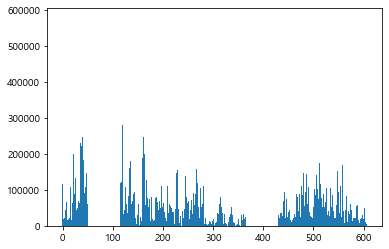

In [82]:
#지하철 시간대별 데이터 시각화... ( 7시 ~ 9시)
f = open('traffic2.csv','r',encoding='utf-8')
data = csv.reader(f, delimiter= ',')
next(data)
next(data)
result =[]

for row in data:
    row[4:] = map(int,row[4:])
    result.append(sum(row[10:15:2]))


plt.bar(range(len(result)),result)
plt.show()

f.close()

In [84]:
#지하철 시간대별 데이터 시각화... ( 7시 ~ 9시)
f = open('traffic2.csv','r',encoding='utf-8')
data = csv.reader(f, delimiter= ',')
next(data)
next(data)

m=0
station =''
for row in data:
    row[4:] = map(int,row[4:])
    if sum(row[11:16:2])>m:
        m=sum(row[11:16:2])
        station = row[1] + ' ' + row[3]



print('출근시간 가장 많이 이용하는 역은 {}역이며 하차인원은 총 {}명입니다'.format(station,m))

f.close()

출근시간 가장 많이 이용하는 역은 2호선 강남역이며 하차인원은 총 628210명입니다


In [90]:
#시간대 별로 사람들이 가장 많이 타고 내리는 역은 어디 일까..
f = open('traffic2.csv','r',encoding='utf-8')
data = csv.reader(f, delimiter= ',')
next(data)
next(data)

result = [0] *24
station = [''] *24
for row in data:
    row[4:] = map(int,row[4:])
    for j in range(24):
        if sum(row[2*j+4:2*j+5]) >result[j]:
            result[j] = sum(row[2*j+4:2*j+5])
            station[j] = row[3]


print(result)
print(station)

f.close()

[9814, 34898, 64964, 168457, 254138, 153056, 83880, 71374, 75531, 83627, 94010, 115131, 131046, 198762, 275982, 168626, 130958, 157792, 121752, 15185, 259, 6, 2, 1]
['구로', '신림', '신림', '신림', '신림', '신림', '신림', '신림', '신림', '강남', '강남', '강남', '강남', '강남', '강남', '강남', '강남', '강남', '강남', '홍대입구', '의정부', '뚝섬', '뚝섬', '인천']


#데이터 분석 프로젝트 진행 과정

# 1. 관심 데이터 찾기 - www.data.go.kr 등등
# 2. 데이터를 살펴 보면서 질문하기
# 3. 질문을 명확한 문제로 정의하기 
    '우리 동네랑 인구 구조가 제일 비슷한 곳을 어딜까?'
    -> '전국에서 역삼 1동의 연령별 인구 구조와 가장 형태가 비슷한 지역은 어딜까?'
# 4. 알고리즘 설게하기
    1. 데이터를 읽어온다.
    2. 궁금한 지역의 이름을 받는다.
    3. 궁금한 지역의 인구구조를 저장한다.
    4. 궁금한 지역의 인구 구조와 가장 비슷한 인구 구조를 가진 지역을 찾는다.
    5. 가장 비슷한 곳의 인구 구조와 궁금한 지역의 인구 구조를 시각화한다.

In [91]:
f = open('people.csv','r',encoding='utf-8')
data = csv.reader(f, delimiter=',')
next(data)

home =[]
name = input()

for row in data:
    if name in row[0]:
        for i in row[1:]:
            home.append(int(i.replace(',','')))

print(home)

[11251, 11251, 73, 53, 47, 57, 54, 57, 53, 55, 48, 62, 46, 47, 61, 84, 59, 92, 72, 90, 91, 96, 129, 131, 130, 139, 150, 187, 167, 187, 196, 204, 174, 163, 185, 179, 172, 166, 172, 175, 152, 177, 163, 153, 134, 146, 143, 127, 146, 166, 176, 185, 176, 232, 206, 190, 203, 202, 218, 170, 203, 221, 243, 237, 217, 187, 184, 163, 177, 132, 122, 123, 105, 94, 119, 99, 115, 76, 86, 68, 73, 80, 60, 57, 54, 40, 39, 27, 19, 19, 13, 10, 7, 7, 2, 1, 1, 1, 0, 0, 2, 0, 0, 11186, 11186, 54, 48, 60, 63, 44, 61, 61, 57, 52, 50, 56, 58, 64, 50, 64, 62, 65, 86, 63, 76, 97, 99, 123, 152, 159, 162, 150, 163, 197, 179, 177, 165, 148, 140, 155, 139, 144, 124, 153, 157, 137, 139, 129, 108, 139, 131, 138, 174, 200, 198, 216, 212, 197, 170, 215, 206, 203, 197, 207, 201, 253, 268, 209, 191, 175, 174, 172, 153, 127, 145, 118, 144, 130, 112, 126, 87, 74, 95, 100, 97, 58, 71, 70, 64, 50, 39, 40, 33, 27, 20, 14, 14, 17, 10, 0, 5, 2, 3, 1, 3, 1]


In [ ]:
# 비교 두 지역

# 1. 지정 지역과 궁금한 지역 데이터 가져온다.
# 2. 각 연령수를 뺀다
# 3. 차이를 모두 더한다.
# 4. 전국의 모든 지역에서 비교한다.

In [96]:


f = open('people.csv','r',encoding='utf-8')
data = csv.reader(f, delimiter=',')
next(data)

home =[]
area=[]
name = input()
result=[]


for row in data:
    if name in row[0]:
        for i in row[3:]:
            home.append(int(i.replace(',','')))

name2= input('비교대상 지역')
for row in data:
    if name2 in row[0]:
        for i in row[3:]:
            area.append(int(i.replace(',','')))


for i in range(len(home)):
    result.append(home[i]-area[i])

sum(result)

IndexError: list index out of range